<a href="https://colab.research.google.com/github/kvamsi7/Deep_Learning/blob/master/MNIST_using_pure-tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

## 
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
a = tf.constant(2)
sess = tf.Session()
sess.run(a)

2

In [ ]:
a1 = tf.constant([[2,3],[4,5]])
a2 = tf.constant([[4,5],[2,3]])
sess.run(tf.matmul(a1,a2))


array([[14, 19],
       [26, 35]], dtype=int32)

In [ ]:
# variables

var1 = tf.Variable(2)
var2 = tf.Variable(3)
var_sum = var1 + var2
sess.run(tf.global_variables_initializer())
sess.run(var_sum)

5

In [ ]:
# var2.assign(5) # won't work
sess.run(var2.assign(5))
sess.run(var_sum)

7

In [ ]:
# place holders

var1 = tf.placeholder(tf.int32)
var2 = tf.Variable(10) * var1
sess.run(tf.global_variables_initializer())
sess.run(var2,feed_dict={var1:10})

100

In [ ]:
# place holders

var1 = tf.placeholder(tf.int32,shape=(1,2))
var2 = tf.Variable(10) * var1
sess.run(tf.global_variables_initializer())
sess.run(var2,feed_dict={var1:[[1,2]]})

array([[10, 20]], dtype=int32)

In [2]:
# Project MNIST

In [3]:
from sklearn.datasets import load_digits

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
# plotting some images 

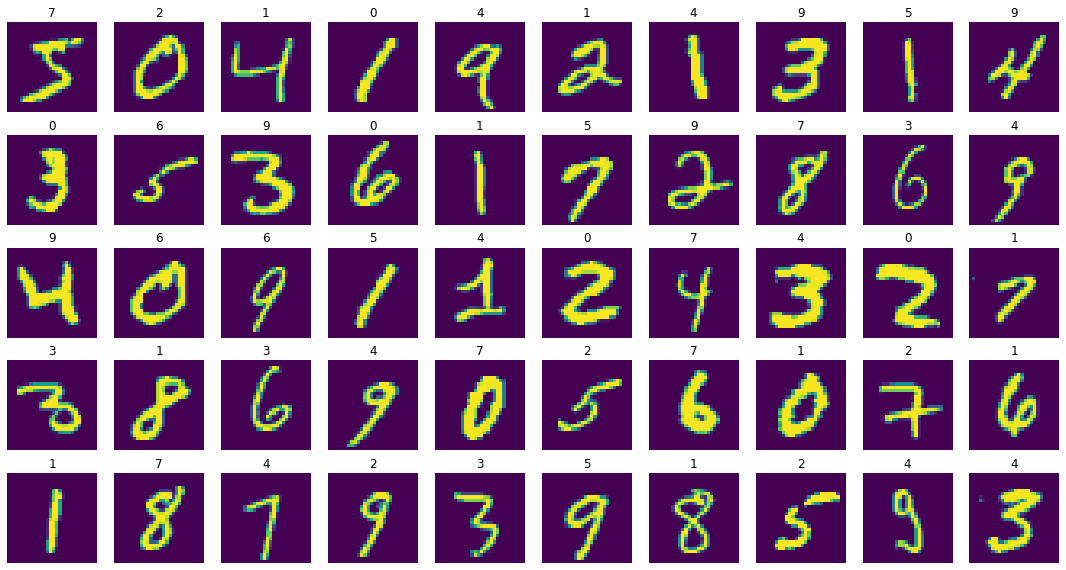

In [7]:
fig = plt.figure(figsize=(15,8))
for i in range(50):
  image = x_train[i]
  image_label = y_test[i]
  ax = fig.add_subplot(5,10,i+1)
  ax.imshow(image)
  ax.axis('off')
  ax.set_title(image_label)
plt.tight_layout()
plt.show()

In [8]:
# initializing the weights

n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1' : tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_hidden_2,n_classes])),
}

biases = {
    'h1' : tf.Variable(tf.random_normal([n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_classes])),
}

In [9]:
# forward propagation

def forward_propagation(x,weights,biases):
  # layer1
  in_layer1 = tf.add(tf.matmul(x,weights['h1']),biases['h1'])
  out_layer1 = tf.nn.relu(in_layer1)

  # layer2
  in_layer2 = tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
  out_layer2 = tf.nn.relu(in_layer2)

  # output layer
  output = tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
  
  return output

In [10]:
print(x_train.shape)
x_train.reshape(-1,784).shape

(60000, 28, 28)


(60000, 784)

In [33]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

one_hot_encoder.fit(y_train.reshape(-1,1))

encoded_train_labels = one_hot_encoder.transform(y_train.reshape(-1,1))
encoded_test_labels =  one_hot_encoder.transform(y_test.reshape(-1,1))

In [49]:
x = tf.placeholder('float',shape=[None,n_input])
y = tf.placeholder(tf.int32,shape=[None,n_classes])

pred = forward_propagation(x,weights,biases)

In [50]:
# Cost 

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels = y))

In [51]:
# optimizer 

optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [52]:
# Running the sesssion

sess = tf.Session()
sess.run(tf.global_variables_initializer())


In [78]:
c,_ = sess.run([cost,optimize],feed_dict={x:x_train.reshape(-1,n_input),y:encoded_train_labels})
c

19120.203

In [61]:
# predictions  = tf.argmax(pred,axis = 1)
# true_labels = tf.argmax(y,axis = 1)
# correct_predictions = tf.equal(predictions,true_labels)

In [23]:
# # for train
# predicted_eval, labels,pred  = sess.run([predictions,true_labels,correct_predictions],feed_dict={x:x_train.reshape(-1,n_input),y:encoded_train})
# predicted_eval, labels,pred

In [17]:
# # for test 
# predicted_eval, labels,pred  = sess.run([predictions,true_labels,correct_predictions],feed_dict={x:x_test.reshape(-1,n_input),y:encoded_test})
# predicted_eval, labels,pred

(array([3, 5, 3, ..., 6, 3, 5]),
 array([7, 2, 1, ..., 4, 5, 6]),
 array([False, False, False, ..., False, False, False]))